## ws_1_1

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
# ===================== 1. 데이터 로드 =====================
# 파일 경로를 지정하고 데이터를 불러온다.
file_path = "customer_data.csv"  # <빈칸>: 'customer_data.csv' CSV 파일 경로를 입력하세요.
customer_data = pd.read_csv(file_path)  # <빈칸>: Pandas의 read_csv() 함수를 사용하여 데이터를 불러오세요.

# 데이터 구조 확인
print(customer_data.info())  # 데이터프레임의 컬럼 정보, 데이터 타입, 결측치 개수 등을 출력
customer_data.describe()  # 수치형 컬럼의 기초 통계 정보(평균, 표준편차, 최소/최대값 등) 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              900 non-null    float64
 2   AnnualIncome     900 non-null    float64
 3   SpendingScore    1000 non-null   int64  
 4   PurchaseHistory  1000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None


,CustomerID,Age,AnnualIncome,SpendingScore,PurchaseHistory
count,1000.000000,900.000000,900.000000,1000.000000,1000.00000
mean,500.500000,43.673333,84.434444,49.915000,10.06200
std,288.819436,15.193815,37.837883,29.368287,5.45985
min,1.000000,18.000000,20.000000,1.000000,1.00000
25%,250.750000,31.000000,52.000000,24.000000,5.00000
50%,500.500000,43.000000,85.500000,49.500000,10.00000
75%,750.250000,57.000000,117.000000,76.000000,15.00000
max,1000.000000,69.000000,149.000000,100.000000,19.00000


In [6]:
# ===================== 2. 결측치 처리 =====================
# dropna(): 결측치(NaN)가 포함된 행을 제거하여 데이터 정제
customer_data = customer_data.dropna()  # <빈칸>: 결측치를 제거하기 위해 dropna() 함수를 사용하세요.

# 결측치 제거 후 데이터 크기 출력
print(f"결측치 제거 후 데이터셋 크기: {customer_data.shape}")  
# shape: (행, 열) 형태의 데이터 크기 출력

결측치 제거 후 데이터셋 크기: (900, 5)


In [7]:
# ===================== 3. 이상치 탐지 및 처리 =====================
# 이상치를 탐지하기 위해 IQR(Interquartile Range, 사분위 범위) 방법 사용
for column in ['Age', 'AnnualIncome']:  # 이상치를 탐지할 컬럼 선택
    Q1 = customer_data[column].quantile(.25)  # <빈칸>: 해당 컬럼의 1사분위 값(25%)을 quantile()을 사용해 구하세요.
    Q3 = customer_data[column].quantile(.75)  # <빈칸>: 해당 컬럼의 3사분위 값(75%)을 quantile()을 사용해 구하세요.
    IQR = Q3 - Q1  # 사분위 범위 계산 (IQR = Q3 - Q1)
    
    # 이상치 경계값 설정
    lower_bound = Q1-1.5*IQR # 하한값: Q1 - 1.5 * IQR
    upper_bound = Q3+1.5*IQR  # 상한값: Q3 + 1.5 * IQR
    
    # 기존 데이터 크기 저장
    initial_shape = customer_data.shape  
    
    # 이상치를 제거한 데이터프레임 생성 (lower_bound보다 크거나 upper_bound보다 작은 데이터만 남김)
    customer_data = customer_data[(customer_data[column]>=lower_bound) & (customer_data[column]<=upper_bound)]
    
    # 이상치 처리 전후 데이터 크기 출력
    print(f"{column} 이상치 처리 전후 데이터셋 크기: {initial_shape} -> {customer_data.shape}")

Age 이상치 처리 전후 데이터셋 크기: (900, 5) -> (900, 5)
AnnualIncome 이상치 처리 전후 데이터셋 크기: (900, 5) -> (900, 5)


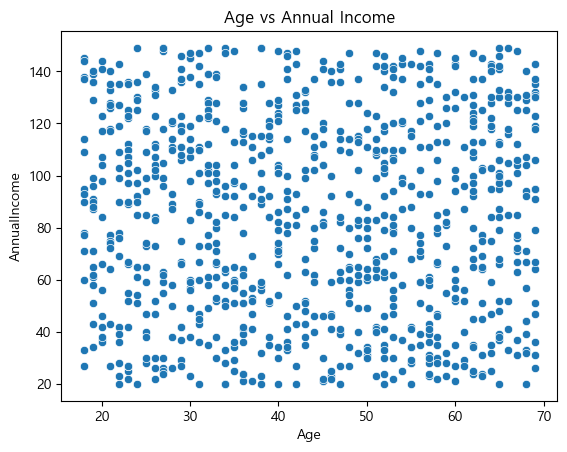

In [8]:
# ===================== 4. 나이와 연간 소득 간의 관계 시각화 =====================
# scatterplot()을 사용하여 'Age'(나이)와 'AnnualIncome'(연간 소득) 간의 관계 시각화
sns.scatterplot(x='Age', y='AnnualIncome', data=customer_data)

# 그래프 제목 설정
plt.title('Age vs Annual Income')

# 그래프 출력
plt.show()

## ws_2_2

In [10]:
# 필요한 라이브러리 불러오기
import pandas as pd

# ===================== 1. 데이터 로드 =====================
# 캠페인 데이터 파일 경로 설정
campaign_file_path = "campaign_data.csv"  # <빈칸>:"campaign_data.csv" 파일 경로를 입력하세요.

# CSV 파일을 데이터프레임으로 로드
df_campaign = pd.read_csv(campaign_file_path)  # <빈칸>: Pandas의 read_csv() 함수를 사용하여 데이터를 불러오세요.

# ===================== 2. 데이터 확인 =====================
# 데이터프레임 기본 정보 출력
print("=== 캠페인 데이터 정보 ===")
df_campaign.info()  # <빈칸>: 데이터프레임의 구조 및 컬럼 정보 확인

#  #   Column         Non-Null Count  Dtype
# ---  ------         --------------  -----
#  0   CampaignID     1000 non-null   int64
#  1   CustomerID     1000 non-null   int64
#  2   Participation  1000 non-null   int64
#  3   Clicks         1000 non-null   int64
#  4   Revenue        1000 non-null   int64

=== 캠페인 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CampaignID     1000 non-null   int64
 1   CustomerID     1000 non-null   int64
 2   Participation  1000 non-null   int64
 3   Clicks         1000 non-null   int64
 4   Revenue        1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [11]:
# 데이터의 상위 5개 행 출력
print("\n=== 캠페인 데이터 샘플 ===")
df_campaign.head()  # <빈칸>: 데이터의 상위 5개 행을 출력하여 확인


=== 캠페인 데이터 샘플 ===


,CampaignID,CustomerID,Participation,Clicks,Revenue
0,4,1,1,2,548
1,1,2,1,19,224
2,5,3,0,0,0
3,1,4,0,0,0
4,5,5,0,0,0


In [12]:
# ===================== 3. 결측치 처리 =====================
# 각 컬럼별 결측치 개수 확인
print("\n=== 결측치 개수 확인 ===")
print(df_campaign.isna().sum())  # <빈칸>: 각 컬럼별 결측치 개수를 확인하는 코드 작성

# 결측치가 있는 경우 제거
df_campaign =df_campaign.dropna()  # <빈칸>: dropna()를 사용하여 결측치를 제거하세요.


=== 결측치 개수 확인 ===
CampaignID       0
CustomerID       0
Participation    0
Clicks           0
Revenue          0
dtype: int64


In [13]:
# ===================== 4. 캠페인 참여율 분석 =====================
# 전체 캠페인 고객 수 계산
total_customers = df_campaign['CustomerID'].count()  # <빈칸>: 데이터셋의 전체 행 개수(고객 수)를 가져오세요.
# 또는 df_campaign.shape[0]를 써도 무방합니다. 

# 캠페인 참여 고객 수 계산
participating_customers = df_campaign[df_campaign["Participation"] == 1].shape[0]  # <빈칸>: Participation이 1인 행 개수를 계산하세요.

# 캠페인 참여율 계산
participation_rate = (participating_customers / total_customers) * 100  # 백분율 변환

# 캠페인 참여율 출력
print("\n=== 캠페인 참여율 분석 ===")
print(f"전체 고객 수: {total_customers}명")
print(df_campaign.shape)
print(df_campaign[df_campaign["Participation"] == 1].shape)
print(f"캠페인 참여 고객 수: {participating_customers}명")
print(f"캠페인 참여율: {participation_rate:.2f}%")  # <빈칸>: 캠페인 참여율 변수를 입력하세요.


=== 캠페인 참여율 분석 ===
전체 고객 수: 1000명
(1000, 5)
(474, 5)
캠페인 참여 고객 수: 474명
캠페인 참여율: 47.40%


In [14]:
# ===================== 5. 캠페인 참여 여부에 따른 매출 비교 =====================
# 캠페인 참여 고객과 비참여 고객의 평균 매출 계산
avg_revenue_participation = df_campaign[df_campaign["Participation"] == 1]["Revenue"].mean()  # <빈칸>: 평균(mean)을 계산하세요.
avg_revenue_non_participation = df_campaign[df_campaign["Participation"] == 0]["Revenue"].mean()  # <빈칸>: 평균(mean)을 계산하세요.

# 평균 매출 비교 출력
print("\n=== 캠페인 참여 여부에 따른 평균 매출 비교 ===")
print(f"캠페인 참여 고객 평균 매출: {avg_revenue_participation:.2f}")
print(f"캠페인 비참여 고객 평균 매출: {avg_revenue_non_participation:.2f}")


=== 캠페인 참여 여부에 따른 평균 매출 비교 ===
캠페인 참여 고객 평균 매출: 553.61
캠페인 비참여 고객 평균 매출: 0.00


In [15]:
# ===================== 6. 캠페인별 평균 매출 분석 =====================
# 각 캠페인별 평균 매출 계산
df_campaign_revenue = df_campaign.groupby("CampaignID")["Revenue"].mean().reset_index()  # <빈칸>: CampaignID 기준으로 그룹화하여 평균 매출을 계산하세요.

# 컬럼명 변경 (캠페인별 평균 매출)
df_campaign_revenue.rename(columns={"Revenue": "AvgRevenue"}, inplace=True)

# 캠페인별 평균 매출 출력
print("\n=== 캠페인별 평균 매출 분석 ===")
print(df_campaign_revenue)


=== 캠페인별 평균 매출 분석 ===
   CampaignID  AvgRevenue
0           1  242.723404
1           2  272.314286
2           3  279.441624
3           4  257.236111
4           5  259.164021


In [16]:
# ===================== 7. 캠페인별 클릭 수 및 매출 비교 =====================
# 각 캠페인별 평균 클릭 수 및 평균 매출 계산
df_campaign_clicks_revenue = df_campaign.groupby("CampaignID")[["Clicks", "Revenue"]].mean().reset_index()  # <빈칸>: CampaignID 기준으로 그룹화하여 평균 클릭 수와 매출을 계산하세요.

# 컬럼명 변경 (캠페인별 평균 클릭 수 및 매출)
df_campaign_clicks_revenue.rename(columns={"Clicks": "AvgClicks", "Revenue": "AvgRevenue"}, inplace=True)

# 캠페인별 평균 클릭 수 및 매출 출력
print("\n=== 캠페인별 평균 클릭 수 및 매출 분석 ===")
print(df_campaign_clicks_revenue)

# print(df_campaign.groupby('CampaignID').mean())


=== 캠페인별 평균 클릭 수 및 매출 분석 ===
   CampaignID  AvgClicks  AvgRevenue
0           1   4.952128  242.723404
1           2   5.228571  272.314286
2           3   5.096447  279.441624
3           4   5.175926  257.236111
4           5   5.047619  259.164021


## ws_2_3

In [17]:
# 필요한 라이브러리 불러오기
import pandas as pd

# ===================== 1. 데이터 로드 =====================
# 판매 데이터 파일 경로 설정
sales_file_path = "sales_data.csv"  # <빈칸>: "sales_data.csv" CSV 파일 경로를 입력하세요.

# CSV 파일을 데이터프레임으로 로드
df_sales = pd.read_csv(sales_file_path)  # <빈칸>: Pandas의 read_csv() 함수를 사용하여 데이터를 불러오세요.

# ===================== 2. 데이터 확인 =====================
# 데이터프레임 기본 정보 출력
print("=== 판매 데이터 정보 ===")
df_sales.info()  # <빈칸>: 데이터프레임의 구조 및 컬럼 정보 확인

=== 판매 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    1000 non-null   object
 1   Product   1000 non-null   object
 2   Price     1000 non-null   int64 
 3   Quantity  1000 non-null   int64 
 4   Date      1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [18]:
# 데이터의 상위 5개 행 출력
print("\n=== 판매 데이터 샘플 ===")
df_sales.head()  # <빈칸>: 데이터의 상위 5개 행을 출력하여 확인


=== 판매 데이터 샘플 ===


,Region,Product,Price,Quantity,Date
0,East,Product B,56,13,2023-01-01
1,West,Product C,21,2,2023-01-02
2,North,Product A,71,8,2023-01-03
3,East,Product A,89,2,2023-01-04
4,East,Product A,97,4,2023-01-05


In [19]:
# ===================== 3. 결측치 처리 =====================
# 각 컬럼별 결측치 개수 확인
print("\n=== 결측치 개수 확인 ===")
print(df_sales.isna().sum())  # <빈칸>: 각 컬럼별 결측치 개수를 확인하는 코드 작성

# 결측치가 있는 경우 제거
df_sales = df_sales.dropna()  # <빈칸>: dropna()를 사용하여 결측치를 제거하세요.


=== 결측치 개수 확인 ===
Region      0
Product     0
Price       0
Quantity    0
Date        0
dtype: int64


In [20]:
# ===================== 4. 총 매출(Total Sales) 컬럼 생성 =====================
# 총 매출(TotalSales) = 가격(Price) * 판매량(Quantity)
df_sales["TotalSales"] = df_sales["Price"] * df_sales["Quantity"]  # <빈칸>: Price와 Quantity를 곱하여 TotalSales 컬럼 생성

# 총 매출 컬럼이 추가된 데이터 확인
print("\n=== 총 매출(TotalSales) 컬럼 추가 후 데이터 확인 ===")
df_sales.info()  # <빈칸>: 데이터를 확인하는 코드 작성


=== 총 매출(TotalSales) 컬럼 추가 후 데이터 확인 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Region      1000 non-null   object
 1   Product     1000 non-null   object
 2   Price       1000 non-null   int64 
 3   Quantity    1000 non-null   int64 
 4   Date        1000 non-null   object
 5   TotalSales  1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [22]:
# ===================== 5. 제품별 가격과 판매량 분석 =====================
# 제품별 평균 가격 계산
df_avg_price = df_sales.groupby("Product")["Price"].mean().reset_index()  # <빈칸>: 제품별 평균 가격 계산

# 제품별 평균 판매량 계산
df_avg_quantity = df_sales.groupby("Product")["Quantity"].mean().reset_index()  # <빈칸>: 제품별 평균 판매량 계산

# 제품별 평균 가격과 평균 판매량 데이터 병합
df_product_analysis = pd.merge(df_avg_price, df_avg_quantity, on="Product")  # <빈칸>: Product 컬럼을 기준으로 병합

# 제품별 평균 가격과 평균 판매량 출력
print("\n=== 제품별 평균 가격과 평균 판매량 분석 ===")
df_product_analysis


=== 제품별 평균 가격과 평균 판매량 분석 ===


,Product,Price,Quantity
0,Product A,56.194757,10.179775
1,Product B,52.509506,10.102662
2,Product C,54.069498,9.756757
3,Product D,52.042654,9.981043


In [23]:
# ===================== 6. 가격과 판매량 간의 상관관계 계산 =====================
# 전체 데이터에서 가격과 판매량 간의 상관계수 계산
correlation = df_sales[["Price", "Quantity"]].corr()  # <빈칸>: Price와 Quantity 간의 상관관계 계산

# 상관계수 출력
print("\n=== 가격과 판매량 간의 상관관계 분석 ===")
correlation


=== 가격과 판매량 간의 상관관계 분석 ===


,Price,Quantity
Price,1.000000,0.018428
Quantity,0.018428,1.000000


In [31]:
# ===================== 7. 제품별 상관관계 분석 =====================
# 제품별 가격과 판매량의 상관계수 계산
df_product_corr = df_sales.groupby("Product")[["Price", "Quantity"]].corr()  # <빈칸>: 제품별 그룹화 후 상관계수 계산

# 데이터 변환 과정 설명:
# 1. groupby("Product")로 제품별 데이터를 그룹화한 후 Price와 Quantity 간의 상관관계를 계산함
# 2. corr() 함수는 기본적으로 두 변수 간의 상관계수를 포함하는 **멀티 인덱스(multi-index) 형태**의 DataFrame을 반환함
# 3. unstack()을 사용하면 멀티 인덱스 형태에서 **행을 확장(flatten)하여 단순한 형태의 데이터프레임으로 변환** 가능
# 4. unstack() 후, 필요한 상관계수 값을 가져오기 위해 `iloc[:, 1]`을 사용하여 Price와 Quantity 간의 상관계수를 추출

df_product_corr = df_product_corr.unstack().iloc[:, 1]  # <빈칸>: unstack()을 활용하여 멀티 인덱스를 해제하고, 필요한 값만 선택

# 제품별 가격과 판매량의 상관계수 출력
print("\n=== 제품별 가격과 판매량 간의 상관관계 분석 ===")
df_product_corr



=== 제품별 가격과 판매량 간의 상관관계 분석 ===


Product
Product A   -0.012294
Product B    0.034287
Product C    0.022198
Product D    0.032146
Name: (Price, Quantity), dtype: float64

## ws_2_4

In [32]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# ===================== 1. 데이터 로드 =====================
# 각 데이터 파일 경로 설정
purchase_file_path = "purchase_history.csv"  # <빈칸>: "purchase_history.csv" 구매 이력 데이터 파일 경로 입력
survey_file_path = "satisfaction_survey.csv"  # <빈칸>: "satisfaction_survey.csv" 고객 만족도 데이터 파일 경로 입력 

# CSV 파일을 데이터프레임으로 로드
df_purchase = pd.read_csv(purchase_file_path)  # <빈칸>: pandas의 read_csv() 함수를 사용하여 데이터 로드
df_survey = pd.read_csv(survey_file_path)  # <빈칸>: 고객 만족도 데이터 로드

In [33]:

# ===================== 2. 데이터 확인 =====================
# 데이터프레임 기본 정보 출력
print("=== 구매 이력 데이터 정보 ===")
print(df_purchase.info())  # <빈칸>: 데이터프레임의 구조 및 컬럼 정보 확인

print("\n=== 고객 만족도 설문 데이터 정보 ===")
print(df_survey.info())  # <빈칸>: 데이터프레임의 구조 및 컬럼 정보 확인

=== 구매 이력 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CustomerID       1000 non-null   int64
 1   PurchaseHistory  1000 non-null   int64
 2   TotalSpent       1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None

=== 고객 만족도 설문 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   CustomerID    1000 non-null   int64
 1   Satisfaction  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB
None


In [35]:
# 데이터의 상위 5개 행 출력
print("\n=== 구매 이력 데이터 샘플 ===")
df_purchase.head()  # <빈칸>: 데이터의 상위 5개 행 출력


=== 구매 이력 데이터 샘플 ===


,CustomerID,PurchaseHistory,TotalSpent
0,1,21,1050
1,2,5,100
2,3,12,516
3,4,13,585
4,5,44,3696


In [37]:
print("\n=== 고객 만족도 설문 데이터 샘플 ===")
df_survey.head()  # <빈칸>: 데이터의 상위 5개 행 출력


=== 고객 만족도 설문 데이터 샘플 ===


,CustomerID,Satisfaction
0,1,1
1,2,1
2,3,10
3,4,4
4,5,4


In [38]:
# ===================== 3. 데이터 병합 =====================
# 두 데이터셋을 CustomerID를 기준으로 병합
df_merged = pd.merge(df_purchase, df_survey, on="CustomerID")  # <빈칸>: 구매 이력과 고객 만족도 데이터를 CustomerID 기준으로 병합

# 병합된 데이터 확인
print("\n=== 병합된 데이터 확인 ===")
df_merged.head()  # <빈칸>: 병합된 데이터의 일부 출력


=== 병합된 데이터 확인 ===


,CustomerID,PurchaseHistory,TotalSpent,Satisfaction
0,1,21,1050,1
1,2,5,100,1
2,3,12,516,10
3,4,13,585,4
4,5,44,3696,4


In [39]:
# ===================== 4. 결측치 처리 =====================
# 각 컬럼별 결측치 개수 확인
print("\n=== 결측치 개수 확인 ===")
print(df_merged.isna().sum())  # <빈칸>: 결측치 개수 확인

# 결측치 제거
df_merged = df_merged.dropna()  # <빈칸>: 결측치가 있는 행 제거

# 결측치 처리 후 데이터 확인
print("\n=== 결측치 처리 후 데이터 크기 ===")
print(df_merged.info())  # <빈칸>: 데이터 크기 확인


=== 결측치 개수 확인 ===
CustomerID         0
PurchaseHistory    0
TotalSpent         0
Satisfaction       0
dtype: int64

=== 결측치 처리 후 데이터 크기 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CustomerID       1000 non-null   int64
 1   PurchaseHistory  1000 non-null   int64
 2   TotalSpent       1000 non-null   int64
 3   Satisfaction     1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB
None


In [41]:
# ===================== 5. 고객 세분화 (구매 이력 기반) =====================
# 구매 횟수(PurchaseHistory)를 기준으로 고객을 세 그룹으로 나누기
def categorize_purchase_history(purchase_count):
    if purchase_count<=15:
        return 'Low'
    elif 15<purchase_count<=30:
        return 'Medium'
    else:
        return 'High'

df_merged["PurchaseCategory"] = df_merged["PurchaseHistory"].apply(categorize_purchase_history)  # <빈칸>: 구매 횟수를 기준으로 고객 그룹화 적용

# 고객 세분화 결과 확인
print("\n=== 구매 횟수 기반 고객 세분화 결과 ===")
df_merged["PurchaseCategory"].value_counts()  # <빈칸>: 각 그룹별 고객 수 확인


=== 구매 횟수 기반 고객 세분화 결과 ===


PurchaseCategory
High      420
Low       291
Medium    289
Name: count, dtype: int64

In [42]:
# ===================== 6. 고객 만족도 기반 세분화 =====================
# 만족도 점수(Satisfaction)를 기준으로 고객을 세 그룹으로 나누기
def categorize_satisfaction(satisfaction_score):
    if satisfaction_score<=3:
        return 'Low'
    elif 3<satisfaction_score<=7:
        return 'Medium'
    else:
        return 'High'

df_merged["SatisfactionCategory"] = df_merged["Satisfaction"].apply(categorize_satisfaction)  # <빈칸>: 고객 만족도를 기준으로 그룹화 적용

# 고객 만족도 세분화 결과 확인
print("\n=== 고객 만족도 기반 세분화 결과 ===")
df_merged["SatisfactionCategory"].value_counts()  # <빈칸>: 각 그룹별 고객 수 확인


=== 고객 만족도 기반 세분화 결과 ===


SatisfactionCategory
Medium    381
High      322
Low       297
Name: count, dtype: int64

In [43]:
# ===================== 7. 각 그룹별 평균 구매 금액 분석 =====================
# 구매 카테고리별 평균 총 지출 금액 분석
df_purchase_analysis = df_merged.groupby("PurchaseCategory")["TotalSpent"].mean().reset_index()  # <빈칸>: 그룹화 후 평균 구매 금액 계산
df_purchase_analysis.rename(columns={"TotalSpent": "AvgSpent"}, inplace=True)  # <빈칸>: 컬럼명 변경

# 구매 카테고리별 평균 지출 금액 출력
print("\n=== 구매 카테고리별 평균 지출 금액 분석 ===")
df_purchase_analysis


=== 구매 카테고리별 평균 지출 금액 분석 ===


,PurchaseCategory,AvgSpent
0,High,2149.033333
1,Low,427.467354
2,Medium,1180.608997


In [44]:
# 만족도 카테고리별 평균 총 지출 금액 분석
df_satisfaction_analysis = df_merged.groupby("SatisfactionCategory")["TotalSpent"].mean().reset_index()  # <빈칸>: 그룹화 후 평균 구매 금액 계산
df_satisfaction_analysis.rename(columns={"TotalSpent": "AvgSpent"}, inplace=True)  # <빈칸>: 컬럼명 변경

# 만족도 카테고리별 평균 지출 금액 출력
print("\n=== 만족도 카테고리별 평균 지출 금액 분석 ===")
df_satisfaction_analysis


=== 만족도 카테고리별 평균 지출 금액 분석 ===


,SatisfactionCategory,AvgSpent
0,High,1292.857143
1,Low,1426.047138
2,Medium,1386.737533


In [45]:
# ===================== 8. 구매 카테고리와 만족도 카테고리 간의 관계 분석 =====================
# 구매 카테고리별 고객 만족도 분포 확인
df_category_relation = df_merged.groupby(["PurchaseCategory", "SatisfactionCategory"])["Satisfaction"].count().reset_index()  # <빈칸>: 그룹화 후 고객 수 계산
df_category_relation.rename(columns={"Satisfaction": "CustomerCount"}, inplace=True)  # <빈칸>: 컬럼명 변경

# 관계 분석 결과 출력
print("\n=== 구매 카테고리와 만족도 카테고리 간의 관계 분석 ===")
df_category_relation


=== 구매 카테고리와 만족도 카테고리 간의 관계 분석 ===


,PurchaseCategory,SatisfactionCategory,CustomerCount
0,High,High,132
1,High,Low,130
2,High,Medium,158
3,Low,High,91
4,Low,Low,79
5,Low,Medium,121
6,Medium,High,99
7,Medium,Low,88
8,Medium,Medium,102



=== 분석된 데이터 저장 완료 ===


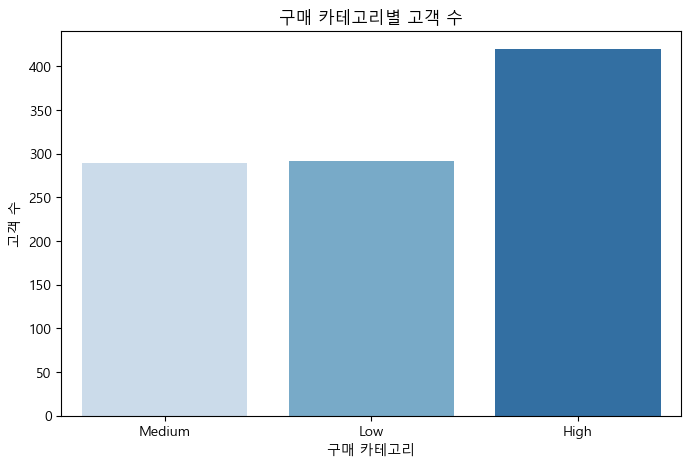

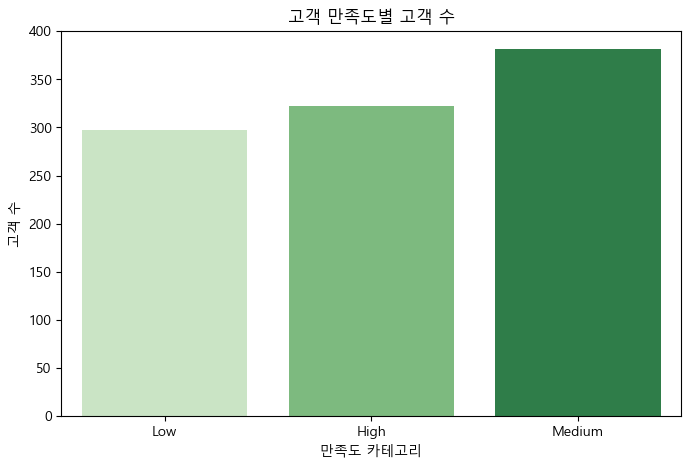

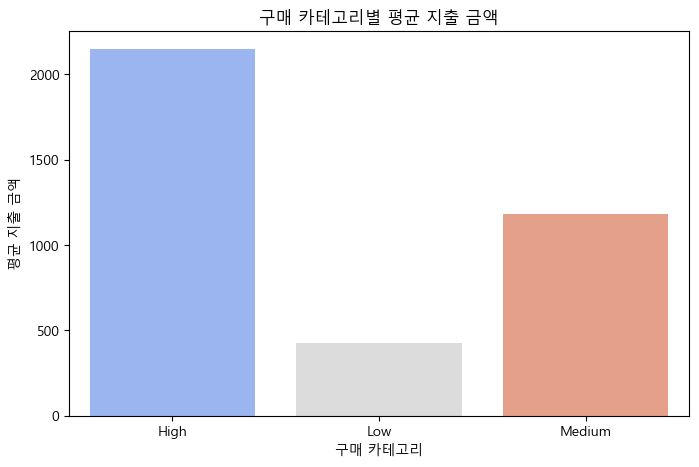

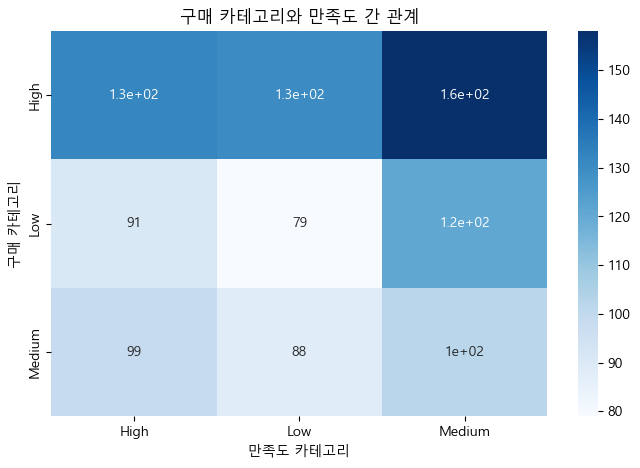

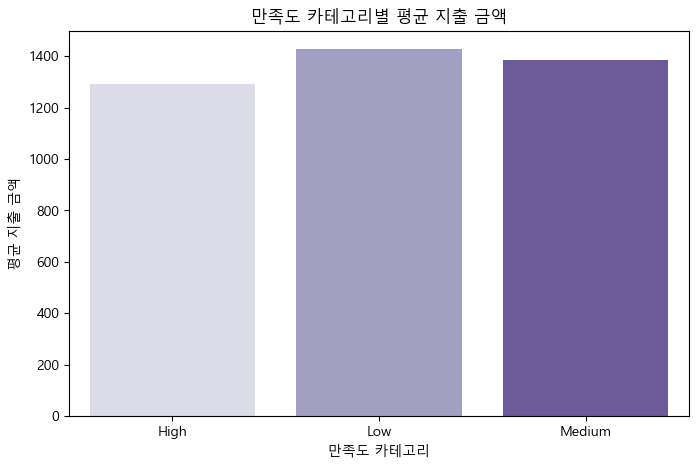

In [46]:
# ===================== 9. 데이터 저장 =====================
# 분석된 데이터를 CSV 파일로 저장
df_merged.to_csv('segmented_customer_data.csv', index=False)  # 파일명 : segmented_customer_data / 구매 이력과 만족도 데이터를 병합한 데이터 저장
df_purchase_analysis.to_csv('purchase_category_analysis.csv', index=False)  # 파일명 : purchase_category_analysis / 구매 카테고리별 평균 지출 금액 데이터 저장
df_satisfaction_analysis.to_csv('satisfaction_category_analysis.csv', index=False)  # 파일명 : satisfaction_category_analysis / 만족도 카테고리별 평균 지출 금액 데이터 저장
df_category_relation.to_csv('category_relation_analysis.csv', index=False)  # 파일명 : category_relation_analysis / 구매 카테고리와 만족도 관계 분석 데이터 저장

print("\n=== 분석된 데이터 저장 완료 ===")

# ===================== 10. 시각화 =====================

# 1) 구매 카테고리별 고객 수 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x="PurchaseCategory", data=df_merged, palette="Blues")
plt.title("구매 카테고리별 고객 수")
plt.xlabel("구매 카테고리")
plt.ylabel("고객 수")
plt.show()

# 2) 고객 만족도별 고객 수 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x="SatisfactionCategory", data=df_merged, palette="Greens")
plt.title("고객 만족도별 고객 수")
plt.xlabel("만족도 카테고리")
plt.ylabel("고객 수")
plt.show()

# 3) 구매 카테고리별 평균 지출 금액 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x="PurchaseCategory", y="AvgSpent", data=df_purchase_analysis, palette="coolwarm")
plt.title("구매 카테고리별 평균 지출 금액")
plt.xlabel("구매 카테고리")
plt.ylabel("평균 지출 금액")
plt.show()

# 4) 구매 카테고리 & 만족도 관계 히트맵
plt.figure(figsize=(8, 5))
heatmap_data = df_category_relation.pivot(index="PurchaseCategory", columns="SatisfactionCategory", values="CustomerCount")
sns.heatmap(heatmap_data, annot=True, cmap="Blues")
plt.title("구매 카테고리와 만족도 간 관계")
plt.xlabel("만족도 카테고리")
plt.ylabel("구매 카테고리")
plt.show()

# 5) 만족도 카테고리별 평균 지출 금액 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x="SatisfactionCategory", y="AvgSpent", data=df_satisfaction_analysis, palette="Purples")
plt.title("만족도 카테고리별 평균 지출 금액")
plt.xlabel("만족도 카테고리")
plt.ylabel("평균 지출 금액")
plt.show()


## ws_2_5

In [79]:
# ===================== 1. 라이브러리 불러오기 =====================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# ===================== 2. 데이터 로드 =====================
# 판매 데이터 파일 경로 설정
sales_file_path = "sales_data_2.csv" # [Q1] 판매 데이터 파일 sales_data.csv 경로 입력

# CSV 파일을 데이터프레임으로 로드
df_sales = pd.read_csv(sales_file_path)  # [Q2] pandas를 사용하여 CSV 파일을 로드

# ===================== 3. 데이터 확인 =====================
# 데이터프레임 기본 정보 출력
print("=== 판매 데이터 정보 ===")
df_sales.info()  # [Q3] 데이터프레임의 컬럼 정보 및 데이터 타입 확인

=== 판매 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ProductID           1000 non-null   int64  
 1   Price               1000 non-null   int64  
 2   SalesVolume         1000 non-null   int64  
 3   DiscountRate        1000 non-null   float64
 4   AdvertisingExpense  1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [80]:
# 데이터의 상위 5개 행 출력
print("\n=== 판매 데이터 샘플 ===")
df_sales.head()  # [Q4] 데이터의 일부 샘플 확인


=== 판매 데이터 샘플 ===


,ProductID,Price,SalesVolume,DiscountRate,AdvertisingExpense
0,1,10,405,0.300956,751
1,2,24,40,0.166796,936
2,3,81,177,0.724999,156
3,4,21,188,0.239064,836
4,5,16,102,0.054814,324


In [81]:
# ===================== 4. 결측치 및 이상치 처리 =====================
# 결측치 확인
print("\n=== 결측치 개수 확인 ===")
print(df_sales.isna().sum())  # [Q5] 각 컬럼의 결측치 개수를 출력


=== 결측치 개수 확인 ===
ProductID             0
Price                 0
SalesVolume           0
DiscountRate          0
AdvertisingExpense    0
dtype: int64


In [82]:
# 이상치 확인 (기초 통계 정보 확인)
print("\n=== 기본 통계 정보 확인 ===")
df_sales.describe()  # [Q6] 데이터의 평균, 표준편차, 최소/최대값 확인


=== 기본 통계 정보 확인 ===


,ProductID,Price,SalesVolume,DiscountRate,AdvertisingExpense
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,55.439000,245.955000,0.494126,505.658000
std,288.819436,25.576247,145.904191,0.292077,279.777434
min,1.000000,10.000000,1.000000,0.001706,10.000000
25%,250.750000,34.000000,116.000000,0.228897,261.000000
50%,500.500000,56.000000,239.500000,0.503061,505.000000
75%,750.250000,77.000000,382.000000,0.750773,752.500000
max,1000.000000,99.000000,499.000000,0.999536,998.000000


In [83]:
# ===================== 5. 매출(TotalRevenue) 컬럼 생성 =====================
# 매출 계산: 매출 = 가격 * 판매량
df_sales["TotalRevenue"] = df_sales['Price'] * df_sales['SalesVolume']  # [Q7] 가격과 판매량을 곱하여 매출을 계산

# 매출 컬럼 추가 후 데이터 확인
print("\n=== 매출(TotalRevenue) 컬럼 추가 후 데이터 확인 ===")
df_sales.info()  # [Q8] 수정된 데이터 확인


=== 매출(TotalRevenue) 컬럼 추가 후 데이터 확인 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ProductID           1000 non-null   int64  
 1   Price               1000 non-null   int64  
 2   SalesVolume         1000 non-null   int64  
 3   DiscountRate        1000 non-null   float64
 4   AdvertisingExpense  1000 non-null   int64  
 5   TotalRevenue        1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [84]:
# ===================== 6. 주요 변수 간 상관관계 분석 =====================
# 가격, 판매량, 할인율, 광고비, 매출 간의 상관관계 분석
correlation_matrix = df_sales[['Price','SalesVolume','DiscountRate','AdvertisingExpense','TotalRevenue']].corr()  # [Q9] 상관관계 분석을 수행할 컬럼 입력

# 상관관계 출력
print("\n=== 주요 변수 간 상관관계 분석 ===")
correlation_matrix  # [Q10] 상관관계 행렬 출력


=== 주요 변수 간 상관관계 분석 ===


,Price,SalesVolume,DiscountRate,AdvertisingExpense,TotalRevenue
Price,1.000000,0.001034,-0.035542,-0.045319,0.589349
SalesVolume,0.001034,1.000000,-0.006243,-0.017337,0.731678
DiscountRate,-0.035542,-0.006243,1.000000,-0.020842,-0.048199
AdvertisingExpense,-0.045319,-0.017337,-0.020842,1.000000,-0.051753
TotalRevenue,0.589349,0.731678,-0.048199,-0.051753,1.000000


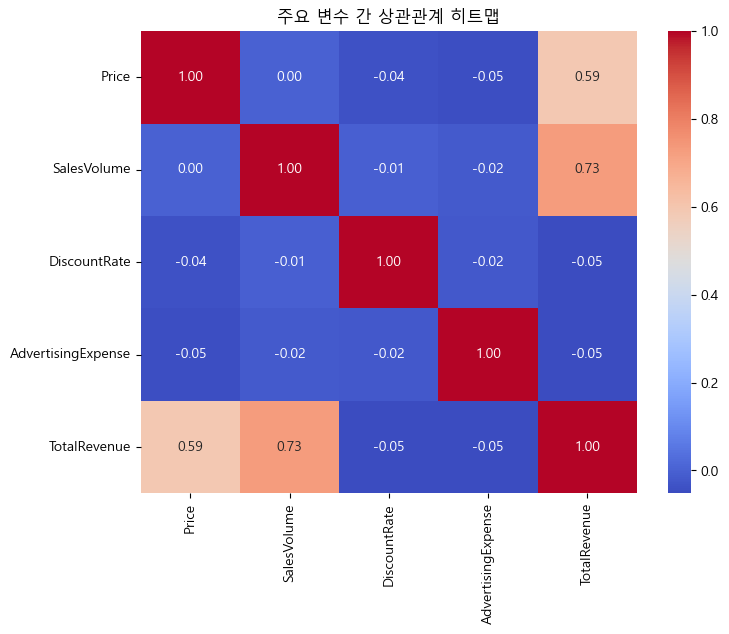

In [85]:
# 1) 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("주요 변수 간 상관관계 히트맵")
plt.show()

In [86]:
# ===================== 7. 데이터 분석 =====================

# 1) 제품별 평균 판매량 분석
df_avg_sales = df_sales.groupby('ProductID')['SalesVolume'].mean().reset_index()  # [Q11] 그룹화할 컬럼과 평균을 낼 컬럼 입력
df_avg_sales = df_avg_sales.sort_values(by='ProductID', ascending=False)  # [Q12] 정렬할 기준 컬럼 입력

print("\n=== 제품별 평균 판매량 상위 10개 ===")
df_avg_sales.head(10)


=== 제품별 평균 판매량 상위 10개 ===


,ProductID,SalesVolume
999,1000,477.0
998,999,17.0
997,998,69.0
996,997,159.0
995,996,7.0
994,995,419.0
993,994,110.0
992,993,315.0
991,992,373.0
990,991,425.0


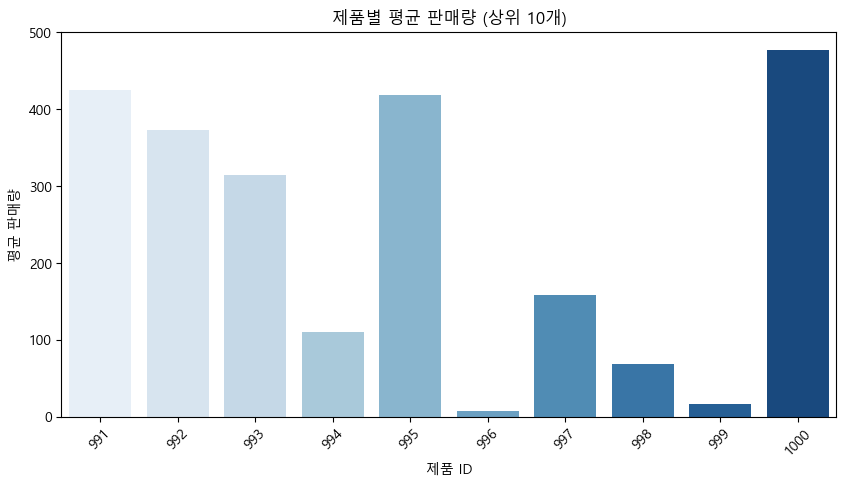


=== 할인율이 높은 제품 10개 ===
764     44
748    342
464    425
393    443
56     183
847    407
722     33
227    247
890     41
346    487
Name: SalesVolume, dtype: int64

=== 할인율이 낮은 제품 10개 ===
896    439
687    232
388    258
158    316
758    322
769    106
632    254
684    360
317    487
883    397
Name: SalesVolume, dtype: int64


In [87]:
# 2) 제품별 평균 판매량 시각화 
plt.figure(figsize=(10, 5))
sns.barplot(x=df_avg_sales["ProductID"][:10], y=df_avg_sales["SalesVolume"][:10], palette="Blues")
plt.title("제품별 평균 판매량 (상위 10개)")
plt.xlabel("제품 ID")
plt.ylabel("평균 판매량")
plt.xticks(rotation=45)
plt.show()

# 2) 할인율이 높은 제품과 낮은 제품 비교
# nlargest(n, column_name): 특정 열(column_name)의 값이 가장 높은 상위 n개의 데이터를 반환
df_high_discount = df_sales.nlargest(10, "DiscountRate")['SalesVolume']  # [Q13] 필요한 컬럼 선택
# nsmallest(n, column_name): 특정 열(column_name)의 값이 가장 낮은 하위 n개의 데이터를 반환
df_low_discount = df_sales.nsmallest(10, "DiscountRate")['SalesVolume']  # [Q14] 필요한 컬럼 선택

print("\n=== 할인율이 높은 제품 10개 ===")
print(df_high_discount)

print("\n=== 할인율이 낮은 제품 10개 ===")
print(df_low_discount)

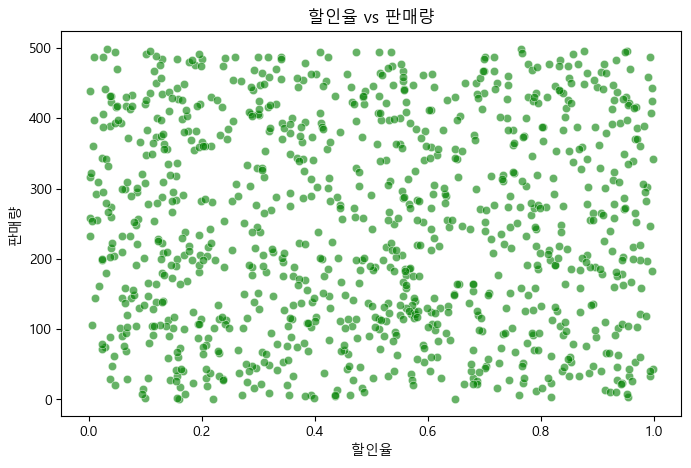


=== 광고비가 높은 제품 10개 ===
227    247
403     34
330    287
927    278
391    313
657    113
55     308
440    393
70     423
290     96
Name: SalesVolume, dtype: int64

=== 광고비가 낮은 제품 10개 ===
633    104
678    149
200    183
729    198
415    265
443    294
457     84
177    458
216    147
744    459
Name: SalesVolume, dtype: int64


In [88]:
# 3) 할인율과 판매량 관계 
plt.figure(figsize=(8, 5))
sns.scatterplot(x="DiscountRate", y="SalesVolume", data=df_sales, alpha=0.6, color="green")
plt.title("할인율 vs 판매량")
plt.xlabel("할인율")
plt.ylabel("판매량")
plt.show()

# 3) 광고비가 높은 제품과 낮은 제품 비교
df_high_ad = df_sales.nlargest(10, "AdvertisingExpense")['SalesVolume']  # [Q15] 필요한 컬럼 선택
df_low_ad = df_sales.nsmallest(10, "AdvertisingExpense")['SalesVolume']  # [Q16] 필요한 컬럼 선택

print("\n=== 광고비가 높은 제품 10개 ===")
print(df_high_ad)

print("\n=== 광고비가 낮은 제품 10개 ===")
print(df_low_ad)

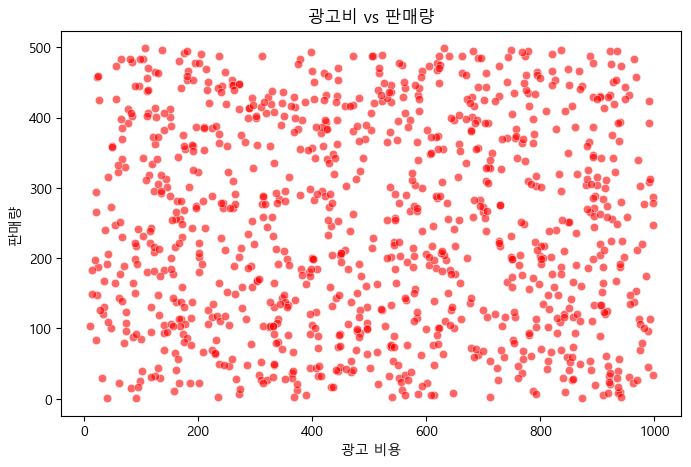


=== 매출 상위 10개 제품 ===
     ProductID  TotalRevenue
614        615         46942
103        104         45496
346        347         45291
20          21         45024
299        300         44256
383        384         43966
561        562         43343
525        526         43120
597        598         42018
699        700         41664


In [95]:
# 4) 광고비와 판매량 관계 
plt.figure(figsize=(8, 5))
sns.scatterplot(x="AdvertisingExpense", y="SalesVolume", data=df_sales, alpha=0.6, color="red")
plt.title("광고비 vs 판매량")
plt.xlabel("광고 비용")
plt.ylabel("판매량")
plt.show()

# 4) 매출 상위 10개 제품 분석
df_top_revenue = df_sales.nlargest(10, "TotalRevenue")[['ProductID','TotalRevenue']]  # [Q17] 필요한 컬럼 선택

print("\n=== 매출 상위 10개 제품 ===")
print(df_top_revenue)

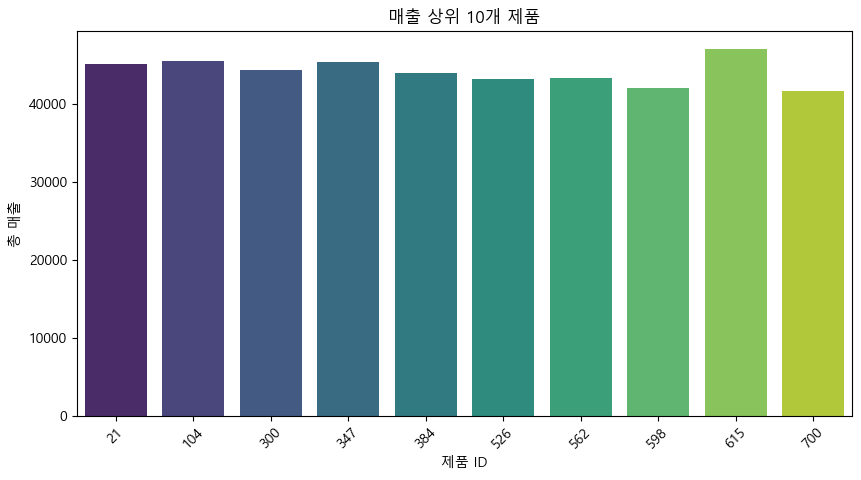

In [97]:
# 5) 매출 상위 10개 제품 분석 
plt.figure(figsize=(10, 5))
sns.barplot(x=df_top_revenue["ProductID"], y=df_top_revenue["TotalRevenue"], palette="viridis")
plt.title("매출 상위 10개 제품")
plt.xlabel("제품 ID")
plt.ylabel("총 매출")
plt.xticks(rotation=45)
plt.show()